# Creating a clustered tsp dataset

In [12]:
from concorde.tsp import TSPSolver
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
def get_random_cluster():
    blobs, _ = datasets.make_blobs(n_samples=np.random.randint(low=300,high=600),center_box=(1500,8500),cluster_std=400, centers = np.random.randint(low=3, high=7))
    blobs = blobs.astype(int)
    for point in blobs:
        if point[0] < 0:
            point[0] = 0
        if point[0] > 10000:
            point[0] = 10000
        if point[1] < 0:
            point[1] = 0
        if point[1]> 10000:
            point[1] = 10000
    return blobs

In [5]:
def solve_tsp(coordinates):
    solver = TSPSolver.from_data(
        coordinates.T[0],
        coordinates.T[1],
        norm="EUC_2D"
    )
    tour_data = solver.solve(time_bound = 60.0,verbose = False, random_seed = 42)
    return tour_data.tour, tour_data.optimal_value

## Create the dataset

In [ ]:
## Do not execute ##
pass
for i in range(2000):
    instance = get_random_cluster()
    tour, opt = solve_tsp(instance)
    result = {
        "comment": f'randomly generated clustered problem with {len(instance)} cities',
        "dimension": len(instance),
        "display_data_type": "COORD_DISPLAY",
        "edge_weight_type": "EUC_2D",
        "name": i,
        "node_coordinates": instance.tolist(),
        "tour": tour.tolist(),
        "tourlength": int(opt),
        "type": "tsp"
    }
    with open(f'tspset2/ctsp_{i}_sol.json', 'w') as fp:
        json.dump(result, fp)

## Visualizing an Example

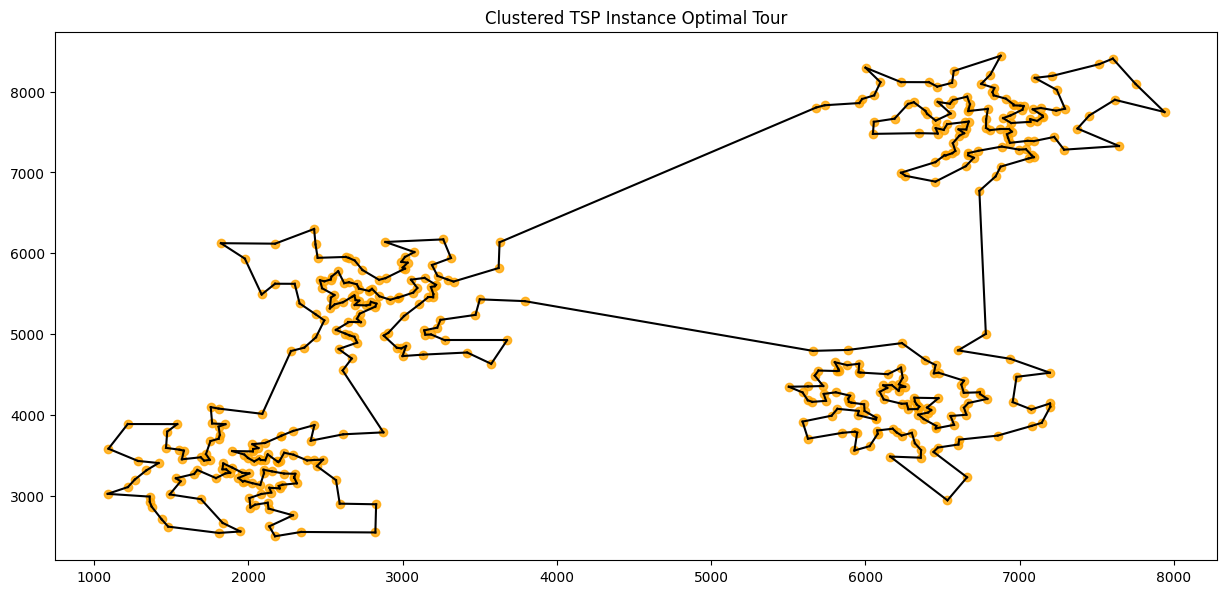

In [136]:
import fileops as fo
from visualisations.visualise_tour import visualise_tour

instance = fo.load_from_json('tspset2/ctsp_303_sol.json')

coordinates = np.array(instance['node_coordinates'])

print_tour(coordinates, instance['tour'], title='Clustered TSP Instance Optimal Tour')

## Calculating the Heuristics for the new tspset

In [128]:
import networkx as nx
from networkx.algorithms.approximation import christofides

def get_mst(G):
    mstree = nx.minimum_spanning_tree(G)
    mstheu = sum([G[u][v]['weight'] for u,v in mstree.edges])
    return mstheu, mstree

def get_nx_graph(coordinates):
    G = nx.complete_graph(n=len(coordinates))
    for u,v in G.edges:
        dist = np.linalg.norm(np.array(coordinates[u]) - np.array(coordinates[v]))
        G.edges[u,v]['weight']=dist
    return G

def get_christo(G, tree=None):
    christo_tour = christofides(G, weight='weight', tree=tree)
    tmp = [(christo_tour[i],christo_tour[(i+1)]) for i in range(len(christo_tour)-1)]
    christo = sum([G[u][v]['weight'] for u,v in tmp])
    return christo
    



In [129]:
# don't execute cell # 
pas
heuristics = {'mstheu': [], 'christo':[]}

In [131]:
for i in range(2000):
    instance = load_from_json(f'tspset2/ctsp_{i}_sol.json')
    G = get_nx_graph(instance['node_coordinates'])
    mstheu, mstree = get_mstheu(G)
    christo = get_christo(G, mstree)
    heuristics['mstheu'].append(mstheu)
    heuristics['christo'].append(christo)
    print(i)
    

In [134]:
with open(f'cheuristics/mst.json', 'w') as fp:
    json.dump(heuristics['mstheu'], fp)

In [135]:
with open(f'cheuristics/christo.json', 'w') as fp:
    json.dump(heuristics['christo'], fp)